In [1]:
import tweepy as tw
import pandas as pd
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
consumer_key = "2AbsOiMPpFRkSf9M9b1a9VG1L"

consumer_secret = "5OV6Paz5jS0qukPeMOfkMxqtGMWro5hLSOdFDOCa8crBvQRPyc"

access_key = "1480449365508378628-L6qvrUMCYZg57ZJioi2y7mo7rqOiMS"

access_secret = "vv36eZvu5cyLVjBT4C0FOoMgstUxMu2PmPxhaekUhROlF"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Extracting Data

In [4]:
search_words = "#wildfire"
date_since = "2018-11-16"

In [5]:
lst=[]
count=0
for tweet in api.search_tweets(q=search_words, lang="en",since_id=date_since,count=100) :
    lst.append(tweet.text)

In [6]:
lst

['RT @CopernicusECMWF: South America has been experiencing unusually high #wildfire activity, with dry conditions across northern Argentina a…',
 'GOES-EAST "Natural Fire" Color Satellite Imagery of Bertha Swamp Road Fire - Bay County, Florida | March 6-7, 2022… https://t.co/HzVvS5gmSS',
 '@_GlobalCrisis_ #wildfire this natural disaster is gaining momentum and sparing nothing in front of it #SouthKorea #GlobalCrisis #fire #KFS',
 'RT @_GlobalCrisis_: On March 5th, near #Uljin County #SouthKorea, a #wildfire burnt 150 homes and 53 other structures; about 6,000 people w…',
 'RT @_GlobalCrisis_: On March 5th, near #Uljin County #SouthKorea, a #wildfire burnt 150 homes and 53 other structures; about 6,000 people w…',
 'RT @CopernicusECMWF: South America has been experiencing unusually high #wildfire activity, with dry conditions across northern Argentina a…',
 'Large wildfires in #Argentina have burned more than a million hectares of agricultural land and ravaged forests, pa… https://t.co/

# Removing links

In [7]:
temp = []
for i in lst :
    URLless_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', str(i))
    temp.append(URLless_string)
temp

['RT @CopernicusECMWF: South America has been experiencing unusually high #wildfire activity, with dry conditions across northern Argentina a…',
 'GOES-EAST "Natural Fire" Color Satellite Imagery of Bertha Swamp Road Fire - Bay County, Florida | March 6-7, 2022… ',
 '@_GlobalCrisis_ #wildfire this natural disaster is gaining momentum and sparing nothing in front of it #SouthKorea #GlobalCrisis #fire #KFS',
 'RT @_GlobalCrisis_: On March 5th, near #Uljin County #SouthKorea, a #wildfire burnt 150 homes and 53 other structures; about 6,000 people w…',
 'RT @_GlobalCrisis_: On March 5th, near #Uljin County #SouthKorea, a #wildfire burnt 150 homes and 53 other structures; about 6,000 people w…',
 'RT @CopernicusECMWF: South America has been experiencing unusually high #wildfire activity, with dry conditions across northern Argentina a…',
 'Large wildfires in #Argentina have burned more than a million hectares of agricultural land and ravaged forests, pa… ',
 'RT @StormChasingVid: Multiple W

# Removing special characters and converting to lower case

In [8]:
new_list = []
for i in temp :
    new_string = re.sub(r"[^a-zA-Z0-9]"," ",i)
    new_string = new_string.lower()
    new_list.append(new_string)
new_list

['rt  copernicusecmwf  south america has been experiencing unusually high  wildfire activity  with dry conditions across northern argentina a ',
 'goes east  natural fire  color satellite imagery of bertha swamp road fire   bay county  florida   march 6 7  2022  ',
 '  globalcrisis   wildfire this natural disaster is gaining momentum and sparing nothing in front of it  southkorea  globalcrisis  fire  kfs',
 'rt   globalcrisis   on march 5th  near  uljin county  southkorea  a  wildfire burnt 150 homes and 53 other structures  about 6 000 people w ',
 'rt   globalcrisis   on march 5th  near  uljin county  southkorea  a  wildfire burnt 150 homes and 53 other structures  about 6 000 people w ',
 'rt  copernicusecmwf  south america has been experiencing unusually high  wildfire activity  with dry conditions across northern argentina a ',
 'large wildfires in  argentina have burned more than a million hectares of agricultural land and ravaged forests  pa  ',
 'rt  stormchasingvid  multiple w

In [9]:
df = pd.DataFrame(new_list)
df

,0
0,rt copernicusecmwf south america has been ex...
1,goes east natural fire color satellite image...
2,globalcrisis wildfire this natural disaste...
3,rt globalcrisis on march 5th near uljin ...
4,rt globalcrisis on march 5th near uljin ...
...,...
95,rt n5sensorsinc one week from today we will...
96,rt globalcrisis on march 5th near uljin ...
97,rt twxman911 ffs cafc flwx durdenpkwyfire...
98,ffs cafc flwx durdenpkwyfire wildfire ca...


# Tokenization

In [10]:
lst_1 = []
for i in new_list :
    words = word_tokenize(i)
    lst_1.append(words)
df_1 = pd.DataFrame(lst_1)
df_1

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,rt,copernicusecmwf,south,america,has,been,experiencing,unusually,high,wildfire,...,a,None,None,None,None,None,None,None,None,None
1,goes,east,natural,fire,color,satellite,imagery,of,bertha,swamp,...,7,2022,None,None,None,None,None,None,None,None
2,globalcrisis,wildfire,this,natural,disaster,is,gaining,momentum,and,sparing,...,fire,kfs,None,None,None,None,None,None,None,None
3,rt,globalcrisis,on,march,5th,near,uljin,county,southkorea,a,...,structures,about,6,000,people,w,None,None,None,None
4,rt,globalcrisis,on,march,5th,near,uljin,county,southkorea,a,...,structures,about,6,000,people,w,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,rt,n5sensorsinc,one,week,from,today,we,will,talking,about,...,if,we,could,detect,wildfi,None,None,None,None,None
96,rt,globalcrisis,on,march,5th,near,uljin,county,southkorea,a,...,structures,about,6,000,people,w,None,None,None,None
97,rt,twxman911,ffs,cafc,flwx,durdenpkwyfire,wildfire,capecoral,leecounty,wildfire,...,sun,3,None,None,None,None,None,None,None,None
98,ffs,cafc,flwx,durdenpkwyfire,wildfire,capecoral,leecounty,wildfire,knocked,down,...,None,None,None,None,None,None,None,None,None,None


# Removing Stop Words 

In [11]:
stop_words = set(stopwords.words('english'))
lst_2 = []
for st in lst_1 :
    filtered_sentence = []
    for word in st :    
        if word not in stop_words :
            filtered_sentence.append(word)
    lst_2.append(filtered_sentence )
print(lst_2)     

[['rt', 'copernicusecmwf', 'south', 'america', 'experiencing', 'unusually', 'high', 'wildfire', 'activity', 'dry', 'conditions', 'across', 'northern', 'argentina'], ['goes', 'east', 'natural', 'fire', 'color', 'satellite', 'imagery', 'bertha', 'swamp', 'road', 'fire', 'bay', 'county', 'florida', 'march', '6', '7', '2022'], ['globalcrisis', 'wildfire', 'natural', 'disaster', 'gaining', 'momentum', 'sparing', 'nothing', 'front', 'southkorea', 'globalcrisis', 'fire', 'kfs'], ['rt', 'globalcrisis', 'march', '5th', 'near', 'uljin', 'county', 'southkorea', 'wildfire', 'burnt', '150', 'homes', '53', 'structures', '6', '000', 'people', 'w'], ['rt', 'globalcrisis', 'march', '5th', 'near', 'uljin', 'county', 'southkorea', 'wildfire', 'burnt', '150', 'homes', '53', 'structures', '6', '000', 'people', 'w'], ['rt', 'copernicusecmwf', 'south', 'america', 'experiencing', 'unusually', 'high', 'wildfire', 'activity', 'dry', 'conditions', 'across', 'northern', 'argentina'], ['large', 'wildfires', 'argen

In [12]:
df3 = pd.DataFrame(lst_2)
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,rt,copernicusecmwf,south,america,experiencing,unusually,high,wildfire,activity,dry,conditions,across,northern,argentina,None,None,None,None,None
1,goes,east,natural,fire,color,satellite,imagery,bertha,swamp,road,fire,bay,county,florida,march,6,7,2022,None
2,globalcrisis,wildfire,natural,disaster,gaining,momentum,sparing,nothing,front,southkorea,globalcrisis,fire,kfs,None,None,None,None,None,None
3,rt,globalcrisis,march,5th,near,uljin,county,southkorea,wildfire,burnt,150,homes,53,structures,6,000,people,w,None
4,rt,globalcrisis,march,5th,near,uljin,county,southkorea,wildfire,burnt,150,homes,53,structures,6,000,people,w,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,rt,n5sensorsinc,one,week,today,talking,wildfire,detection,sensors,sxsw2022,could,detect,wildfi,None,None,None,None,None,None
96,rt,globalcrisis,march,5th,near,uljin,county,southkorea,wildfire,burnt,150,homes,53,structures,6,000,people,w,None
97,rt,twxman911,ffs,cafc,flwx,durdenpkwyfire,wildfire,capecoral,leecounty,wildfire,knocked,pretty,good,442pm,est,sun,3,None,None
98,ffs,cafc,flwx,durdenpkwyfire,wildfire,capecoral,leecounty,wildfire,knocked,pretty,good,442pm,es,None,None,None,None,None,None


# Stemming

In [13]:
ps = PorterStemmer()
stemmed_words = []
for st in lst_2 :
    filtered_sentence = []
    for word in st :    
        filtered_sentence.append(ps.stem(word))
    stemmed_words.append(filtered_sentence )

In [14]:
df4 = pd.DataFrame(stemmed_words)
df4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,rt,copernicusecmwf,south,america,experienc,unusu,high,wildfir,activ,dri,condit,across,northern,argentina,None,None,None,None,None
1,goe,east,natur,fire,color,satellit,imageri,bertha,swamp,road,fire,bay,counti,florida,march,6,7,2022,None
2,globalcrisi,wildfir,natur,disast,gain,momentum,spare,noth,front,southkorea,globalcrisi,fire,kf,None,None,None,None,None,None
3,rt,globalcrisi,march,5th,near,uljin,counti,southkorea,wildfir,burnt,150,home,53,structur,6,000,peopl,w,None
4,rt,globalcrisi,march,5th,near,uljin,counti,southkorea,wildfir,burnt,150,home,53,structur,6,000,peopl,w,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,rt,n5sensorsinc,one,week,today,talk,wildfir,detect,sensor,sxsw2022,could,detect,wildfi,None,None,None,None,None,None
96,rt,globalcrisi,march,5th,near,uljin,counti,southkorea,wildfir,burnt,150,home,53,structur,6,000,peopl,w,None
97,rt,twxman911,ff,cafc,flwx,durdenpkwyfir,wildfir,capecor,leecounti,wildfir,knock,pretti,good,442pm,est,sun,3,None,None
98,ff,cafc,flwx,durdenpkwyfir,wildfir,capecor,leecounti,wildfir,knock,pretti,good,442pm,es,None,None,None,None,None,None


# Lemmatization

In [15]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = []
for st in lst_2 :
    filtered_sentence = []
    for word in st :    
        filtered_sentence.append(lemmatizer.lemmatize(word))
    lemmatized_words.append(filtered_sentence )
lemmatized_words

[['rt',
  'copernicusecmwf',
  'south',
  'america',
  'experiencing',
  'unusually',
  'high',
  'wildfire',
  'activity',
  'dry',
  'condition',
  'across',
  'northern',
  'argentina'],
 ['go',
  'east',
  'natural',
  'fire',
  'color',
  'satellite',
  'imagery',
  'bertha',
  'swamp',
  'road',
  'fire',
  'bay',
  'county',
  'florida',
  'march',
  '6',
  '7',
  '2022'],
 ['globalcrisis',
  'wildfire',
  'natural',
  'disaster',
  'gaining',
  'momentum',
  'sparing',
  'nothing',
  'front',
  'southkorea',
  'globalcrisis',
  'fire',
  'kfs'],
 ['rt',
  'globalcrisis',
  'march',
  '5th',
  'near',
  'uljin',
  'county',
  'southkorea',
  'wildfire',
  'burnt',
  '150',
  'home',
  '53',
  'structure',
  '6',
  '000',
  'people',
  'w'],
 ['rt',
  'globalcrisis',
  'march',
  '5th',
  'near',
  'uljin',
  'county',
  'southkorea',
  'wildfire',
  'burnt',
  '150',
  'home',
  '53',
  'structure',
  '6',
  '000',
  'people',
  'w'],
 ['rt',
  'copernicusecmwf',
  'south',
  'a

In [16]:
data = pd.DataFrame(lemmatized_words)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,rt,copernicusecmwf,south,america,experiencing,unusually,high,wildfire,activity,dry,condition,across,northern,argentina,None,None,None,None,None
1,go,east,natural,fire,color,satellite,imagery,bertha,swamp,road,fire,bay,county,florida,march,6,7,2022,None
2,globalcrisis,wildfire,natural,disaster,gaining,momentum,sparing,nothing,front,southkorea,globalcrisis,fire,kfs,None,None,None,None,None,None
3,rt,globalcrisis,march,5th,near,uljin,county,southkorea,wildfire,burnt,150,home,53,structure,6,000,people,w,None
4,rt,globalcrisis,march,5th,near,uljin,county,southkorea,wildfire,burnt,150,home,53,structure,6,000,people,w,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,rt,n5sensorsinc,one,week,today,talking,wildfire,detection,sensor,sxsw2022,could,detect,wildfi,None,None,None,None,None,None
96,rt,globalcrisis,march,5th,near,uljin,county,southkorea,wildfire,burnt,150,home,53,structure,6,000,people,w,None
97,rt,twxman911,ffs,cafc,flwx,durdenpkwyfire,wildfire,capecoral,leecounty,wildfire,knocked,pretty,good,442pm,est,sun,3,None,None
98,ffs,cafc,flwx,durdenpkwyfire,wildfire,capecoral,leecounty,wildfire,knocked,pretty,good,442pm,e,None,None,None,None,None,None


# Difference in Stemming and Lemmatizatioin

In [17]:
word = 'studies'
print('Stemming : ' , ps.stem(word))
print('Lemmatization : ' , lemmatizer.lemmatize(word))

Stemming :  studi
Lemmatization :  study


# POS Tagging

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [19]:
string_ = 'Python is an interpreted high-level general-purpose programming language. Its design philosophy emphasizes code readability with its use of significant indentation. Its language constructs as well as its object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.'
string_

'Python is an interpreted high-level general-purpose programming language. Its design philosophy emphasizes code readability with its use of significant indentation. Its language constructs as well as its object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.'

In [20]:
tokenized = sent_tokenize(string_)
tokenized

['Python is an interpreted high-level general-purpose programming language.',
 'Its design philosophy emphasizes code readability with its use of significant indentation.',
 'Its language constructs as well as its object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.']

In [21]:
for i in tokenized:
      
    wordsList = nltk.word_tokenize(i)
    wordsList = [w for w in wordsList if not w in stop_words] 
    tagged = nltk.pos_tag(wordsList)
  
    print(tagged, end='\n\n')

[('Python', 'NNP'), ('interpreted', 'VBD'), ('high-level', 'JJ'), ('general-purpose', 'JJ'), ('programming', 'NN'), ('language', 'NN'), ('.', '.')]

[('Its', 'PRP$'), ('design', 'NN'), ('philosophy', 'NN'), ('emphasizes', 'VBZ'), ('code', 'NN'), ('readability', 'NN'), ('use', 'NN'), ('significant', 'JJ'), ('indentation', 'NN'), ('.', '.')]

[('Its', 'PRP$'), ('language', 'NN'), ('constructs', 'NNS'), ('well', 'RB'), ('object-oriented', 'JJ'), ('approach', 'NN'), ('aim', 'NN'), ('help', 'NN'), ('programmers', 'NNS'), ('write', 'VBP'), ('clear', 'JJ'), (',', ','), ('logical', 'JJ'), ('code', 'NN'), ('small', 'JJ'), ('large-scale', 'JJ'), ('projects', 'NNS'), ('.', '.')]



In [22]:
for st in lemmatized_words :

    print(nltk.pos_tag(st), end='\n\n')

[('rt', 'NN'), ('copernicusecmwf', 'NN'), ('south', 'NN'), ('america', 'IN'), ('experiencing', 'VBG'), ('unusually', 'RB'), ('high', 'JJ'), ('wildfire', 'NN'), ('activity', 'NN'), ('dry', 'JJ'), ('condition', 'NN'), ('across', 'IN'), ('northern', 'JJ'), ('argentina', 'NN')]

[('go', 'VB'), ('east', 'JJ'), ('natural', 'JJ'), ('fire', 'NN'), ('color', 'NN'), ('satellite', 'NN'), ('imagery', 'NN'), ('bertha', 'NN'), ('swamp', 'NN'), ('road', 'NN'), ('fire', 'NN'), ('bay', 'NN'), ('county', 'NN'), ('florida', 'VBN'), ('march', 'VBP'), ('6', 'CD'), ('7', 'CD'), ('2022', 'CD')]

[('globalcrisis', 'NN'), ('wildfire', 'NN'), ('natural', 'JJ'), ('disaster', 'NN'), ('gaining', 'VBG'), ('momentum', 'NN'), ('sparing', 'VBG'), ('nothing', 'NN'), ('front', 'JJ'), ('southkorea', 'JJ'), ('globalcrisis', 'NN'), ('fire', 'NN'), ('kfs', 'NN')]

[('rt', 'NN'), ('globalcrisis', 'NN'), ('march', 'NN'), ('5th', 'CD'), ('near', 'IN'), ('uljin', 'JJ'), ('county', 'NN'), ('southkorea', 'NN'), ('wildfire', 'NN')

[('rt', 'NN'), ('sgsf', 'NN'), ('forest', 'VBD'), ('2', 'CD'), ('2', 'CD'), ('resident', 'NN'), ('use', 'NN'), ('extreme', 'JJ'), ('caution', 'NN'), ('ignition', 'NN'), ('source', 'NN'), ('outdoors', 'NNS'), ('evacuation', 'VBP'), ('plan', 'NN'), ('ready', 'JJ'), ('especial', 'JJ')]

[('rt', 'NN'), ('sgsf', 'NN'), ('forest', 'VBD'), ('2', 'CD'), ('2', 'CD'), ('resident', 'NN'), ('use', 'NN'), ('extreme', 'JJ'), ('caution', 'NN'), ('ignition', 'NN'), ('source', 'NN'), ('outdoors', 'NNS'), ('evacuation', 'VBP'), ('plan', 'NN'), ('ready', 'JJ'), ('especial', 'JJ')]

[('rt', 'NN'), ('themeck', 'NN'), ('wildfire', 'NN'), ('continues', 'VBZ'), ('spread', 'VBN'), ('across', 'IN'), ('floridapanhandle', 'JJ'), ('1', 'CD'), ('000', 'CD'), ('home', 'NN'), ('evacuated', 'VBD'), ('1', 'CD'), ('500', 'CD'), ('acre', 'JJ'), ('burn', 'NN'), ('tree', 'NN')]

[('rt', 'NN'), ('sgsf', 'NN'), ('forest', 'VBD'), ('2', 'CD'), ('2', 'CD'), ('resident', 'NN'), ('use', 'NN'), ('extreme', 'JJ'), ('caution', 'NN'

In [23]:
def getTag() :
    pos = []
    for st in lemmatized_words :
        pos.append(nltk.pos_tag(st))
        
    noun = []
    verb = []
    adverb = []
    adjective = []
    preposition = []
    
    for i in pos :
        for j in i :
            if (j[1] == "NN" or j[1] == "NNS" or j[1] == "NNP" or j[1] == "NNPS") :
                noun.append(j[0])
            if (j[1] == "VB" or j[1] == "VBG" or j[1] == "VBP" or j[1] == "VBD" or j[1] == "VBN") :
                verb.append(j[0])
            if (j[1] == "RB" or j[1] == "RBR" or j[1] == "RBS") :
                adverb.append(j[0])
            if (j[1] == "JJ" or j[1] == "JJR" or j[1] == "JJS") :
                adjective.append(j[0])
            if (j[1] == "IN") :
                preposition.append(j[0])
             
    
    return noun, adverb, adjective, preposition, verb

In [24]:
noun, adverb, adjective, preposition, verb = getTag()

In [25]:
print("Nouns \n\n")
print(noun , end = "\n\n")
print("Adverbs \n\n")
print(adverb , end = "\n\n")
print("Adjectives \n\n")
print(adjective , end = "\n\n")
print("Prepositions \n\n")
print(preposition , end = "\n\n")
print("Verbs \n\n")
print(verb , end = "\n\n")

Nouns 


['rt', 'copernicusecmwf', 'south', 'wildfire', 'activity', 'condition', 'argentina', 'fire', 'color', 'satellite', 'imagery', 'bertha', 'swamp', 'road', 'fire', 'bay', 'county', 'globalcrisis', 'wildfire', 'disaster', 'momentum', 'nothing', 'globalcrisis', 'fire', 'kfs', 'rt', 'globalcrisis', 'march', 'county', 'southkorea', 'wildfire', 'home', 'structure', 'people', 'rt', 'globalcrisis', 'march', 'county', 'southkorea', 'wildfire', 'home', 'structure', 'people', 'rt', 'copernicusecmwf', 'south', 'wildfire', 'activity', 'condition', 'argentina', 'wildfire', 'argentina', 'hectare', 'land', 'pa', 'rt', 'stormchasingvid', 'wildfire', 'rage', 'control', 'county', 'wx', 'manmike', 'flwx', 'wil', 'rt', 'globalcrisis', 'march', 'county', 'southkorea', 'wildfire', 'home', 'structure', 'people', 'rt', 'globalcrisis', 'official', 'people', 'home', 'result', 'w', 'rt', 'stormchasingvid', 'wildfire', 'rage', 'control', 'county', 'wx', 'manmike', 'flwx', 'wil', 'wildfire', 'rage', 'control

# Frequency, WordCloud and Masking 

In [26]:
words = []
for i in lemmatized_words :
    for j in i :
        if j != 'rt' :
            words.append(j)

In [27]:
print(words)

['copernicusecmwf', 'south', 'america', 'experiencing', 'unusually', 'high', 'wildfire', 'activity', 'dry', 'condition', 'across', 'northern', 'argentina', 'go', 'east', 'natural', 'fire', 'color', 'satellite', 'imagery', 'bertha', 'swamp', 'road', 'fire', 'bay', 'county', 'florida', 'march', '6', '7', '2022', 'globalcrisis', 'wildfire', 'natural', 'disaster', 'gaining', 'momentum', 'sparing', 'nothing', 'front', 'southkorea', 'globalcrisis', 'fire', 'kfs', 'globalcrisis', 'march', '5th', 'near', 'uljin', 'county', 'southkorea', 'wildfire', 'burnt', '150', 'home', '53', 'structure', '6', '000', 'people', 'w', 'globalcrisis', 'march', '5th', 'near', 'uljin', 'county', 'southkorea', 'wildfire', 'burnt', '150', 'home', '53', 'structure', '6', '000', 'people', 'w', 'copernicusecmwf', 'south', 'america', 'experiencing', 'unusually', 'high', 'wildfire', 'activity', 'dry', 'condition', 'across', 'northern', 'argentina', 'large', 'wildfire', 'argentina', 'burned', 'million', 'hectare', 'agricu

In [28]:
freq = nltk.FreqDist(words)
top10 = freq.most_common(10)
top10

[('wildfire', 83),
 ('6', 35),
 ('home', 35),
 ('county', 34),
 ('globalcrisis', 33),
 ('people', 31),
 ('march', 30),
 ('southkorea', 30),
 ('w', 30),
 ('5th', 28)]

In [29]:
top10_words = []
for i in top10:
    top10_words.append(i[0])
top10_words

['wildfire',
 '6',
 'home',
 'county',
 'globalcrisis',
 'people',
 'march',
 'southkorea',
 'w',
 '5th']

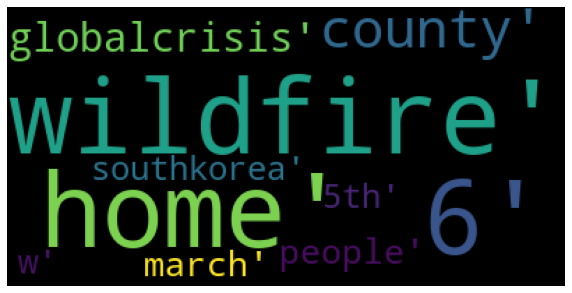

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color = 'black').generate(str(top10_words))
plt.figure(figsize =(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [31]:
import numpy as np
from PIL import Image

In [32]:
mask = np.array(Image.open("D:/DOCUMENTS/PYTHON/SEM 6/Computational  Linguistics and NLP/heart.jpeg"))
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [33]:
wordcloud = WordCloud(width = 3000, height = 2000, 
                      random_state=1, 
                      background_color='white', 
                      colormap='Set2' ,
                      collocations=False,
                      mask=mask).generate(str(top10_words))

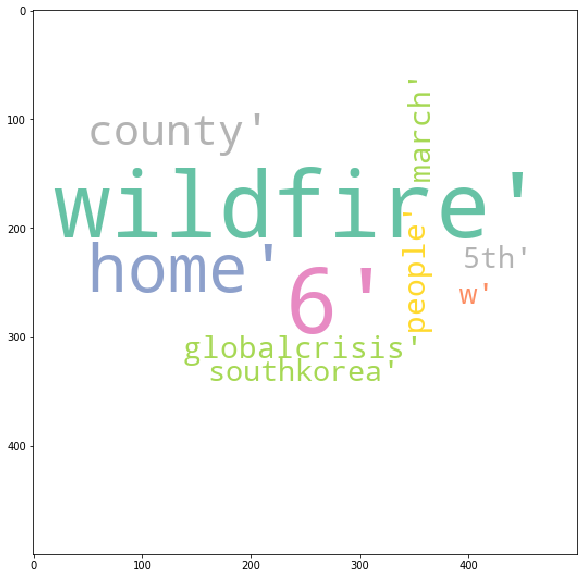

In [34]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='none')
plt.show()
wordcloud.to_file("heart.jpg")